In [15]:
import numpy as np
import pandas as pd
import numpy.ma as ma
# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt

### Read Data
    Since our business objective is to offer recommendation for customers during this season (Spring & Summer), we truncated the dataset and selected latest data from 2020 March - Auagust for further analysis.

In [43]:
transactions = pd.read_csv('transactions_2020ss.csv')
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,Month
0,2020-03-01,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,751628002,0.02,1,2020,3
1,2020-03-01,0008968c0d451dbc5a9968da03196fe20051965edde741...,675662028,0.04,2,2020,3
2,2020-03-01,001127bffdda108579e6cb16080440e89bf1250a776c6e...,821152004,0.03,2,2020,3
3,2020-03-01,001127bffdda108579e6cb16080440e89bf1250a776c6e...,860738001,0.03,2,2020,3
4,2020-03-01,00117f79ce61af038e143ee26448e8401fdbff51f48d5a...,822957002,0.05,2,2020,3


In [34]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
year                0
Month               0
dtype: int64

In [9]:
customers = pd.read_csv('customers_2020ss.csv')
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [13]:
customers.isnull().sum()

customer_id                    0
FN                        454932
Active                    459841
club_member_status          1128
fashion_news_frequency      2983
age                         4616
postal_code                    0
dtype: int64

In [100]:
pd.set_option('display.max_columns', None)
articles = pd.read_csv('articles_2020ss.csv')
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
3,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [14]:
articles.isnull().sum()

article_id                       0
product_code                     0
prod_name                        0
product_type_no                  0
product_type_name                0
product_group_name               0
graphical_appearance_no          0
graphical_appearance_name        0
colour_group_code                0
colour_group_name                0
perceived_colour_value_id        0
perceived_colour_value_name      0
perceived_colour_master_id       0
perceived_colour_master_name     0
department_no                    0
department_name                  0
index_code                       0
index_name                       0
index_group_no                   0
index_group_name                 0
section_no                       0
section_name                     0
garment_group_no                 0
garment_group_name               0
detail_desc                     96
dtype: int64

### Feature Engineering -- Missing Value & Unique Value Check

In [21]:
# Define helper function to check missing values and Unique values for each 3 df
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [25]:
missing_data(articles).head(7).style.set_properties(**{'background-color': 'rgba(245, 181, 152,.5)'})

,Total,Percent
detail_desc,96,0.189727
perceived_colour_value_name,0,0.000000
product_code,0,0.000000
prod_name,0,0.000000
product_type_no,0,0.000000
product_type_name,0,0.000000
product_group_name,0,0.000000


In [19]:
missing_data(customers).style.set_properties(**{'background-color': 'rgba(245, 245, 152,.5)'})

,Total,Percent
Active,459841,62.001507
FN,454932,61.339615
age,4616,0.622387
fashion_news_frequency,2983,0.402205
club_member_status,1128,0.152091
postal_code,0,0.000000
customer_id,0,0.000000


In [20]:
missing_data(transactions).style.set_properties(**{'background-color': 'rgba(152, 243, 245,.5)'})

,Total,Percent
Month,0,0.000000
year,0,0.000000
sales_channel_id,0,0.000000
price,0,0.000000
article_id,0,0.000000
customer_id,0,0.000000
t_dat,0,0.000000


In [26]:
unique_values(articles).style.set_properties(**{'background-color': 'rgba(145, 178, 227,.5)'})

,Total,Uniques
article_id,50599,50599
product_code,50599,24433
prod_name,50599,24535
product_type_no,50599,125
product_type_name,50599,124
product_group_name,50599,18
graphical_appearance_no,50599,30
graphical_appearance_name,50599,30
colour_group_code,50599,50
colour_group_name,50599,50


In [27]:
unique_values(customers).style.set_properties(**{'background-color': 'rgba(130, 126, 230,.5)'})

,Total,Uniques
customer_id,741661,741661
FN,286729,1
Active,281820,1
club_member_status,740533,3
fashion_news_frequency,738678,3
age,737045,83
postal_code,741661,290909


In [29]:
unique_values(transactions).style.set_properties(**{'background-color': 'rgba(188, 126, 230,.5)'})

,Total,Uniques
t_dat,8103650,184
customer_id,8103650,741661
article_id,8103650,50599
price,8103650,6639
sales_channel_id,8103650,2
year,8103650,1
Month,8103650,6


From this unqiue value transaction table, it is noticeable that the number of different prices is quite small. Out of 8.1M transactions, there are 0.74M customers, buying 51K different articles within 184 dates.

In [31]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [35]:
transactions.describe()

,article_id,price,sales_channel_id,year,Month
count,8103650.00,8103650.00,8103650.00,8103650.00,8103650.00
mean,774402972.43,15.56,1.74,2020.00,5.59
std,123254490.48,9.61,0.44,0.00,1.61
min,108775015.00,0.02,1.00,2020.00,3.00
25%,730683041.00,9.61,1.00,2020.00,4.00
50%,816563001.00,14.39,2.00,2020.00,6.00
75%,855706002.00,19.99,2.00,2020.00,7.00
max,952267001.00,299.00,2.00,2020.00,8.00


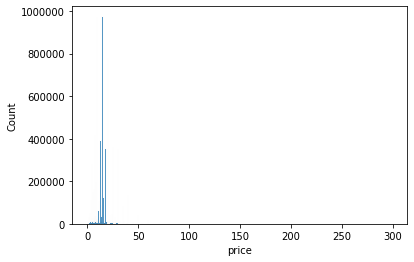

In [38]:
import seaborn as sns
sns.histplot(data = transactions, x = 'price')

### Data Cleaning

In [45]:
articles['index_name'].value_counts()

Ladieswear                        14716
Divided                            8225
Menswear                           5534
Lingeries/Tights                   4305
Children Sizes 92-140              3996
Ladies Accessories                 3799
Children Sizes 134-170             3450
Baby Sizes 50-98                   3402
Sport                              1616
Children Accessories, Swimwear     1556
Name: index_name, dtype: int64

### EDA

#### Articles
    product_group_name： Group Name of Product e.g. Underwear (Usually Broader than type_name)
    product_type_name：Type Name of Product e.g. Bra
    department_name: 244 in total
    Personal Preference: 
    Garment Group_name > department_name(too detailed)
    Product Group > Product Type

In [50]:
def pie_chart(df, col_values, labels, ax, color, title):
    n_classes = len(df)
    explode = (0.1,) * n_classes # explode for 0.1 each slice
    ax.pie(df[col_values],
           colors=color, 
           explode=explode,
           labels=df[labels],
           shadow=True,
           )
    ax.set_title(title, fontsize=16)
    
def bar_plot(df, col_x, col_y, ax, color, title):
    ax.bar(x=df[col_x],
           height=df[col_y],
           color=color)
    ax.set_title(title, fontsize=16) 
    plt.xticks(rotation=90)

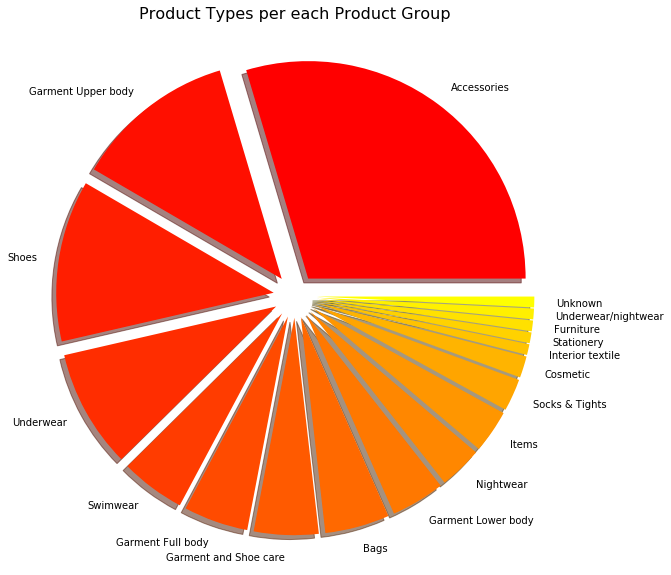

In [51]:
temp = articles.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,'Product Types': temp.values})
df = df.sort_values(['Product Types'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
color = plt.cm.autumn(np.linspace(0, 1, len(df)))

pie_chart(df,
          'Product Types', 
          'Product Group',
          axes, 
          color,  
          "Product Types per each Product Group")  

In [42]:
temp

product_group_name
Accessories              37
Bags                      6
Cosmetic                  2
Furniture                 1
Garment Full body         6
Garment Lower body        5
Garment Upper body       15
Garment and Shoe care     6
Interior textile          1
Items                     4
Nightwear                 4
Shoes                    15
Socks & Tights            3
Stationery                1
Swimwear                  6
Underwear                11
Underwear/nightwear       1
Unknown                   1
Name: product_type_name, dtype: int64

    Accessories, Garment Upper Body, Shoes are the top 3 product groups with most number of Product Types. 

In [ ]:
temp = articles.groupby(["product_types"])["articles_id"].nunique()



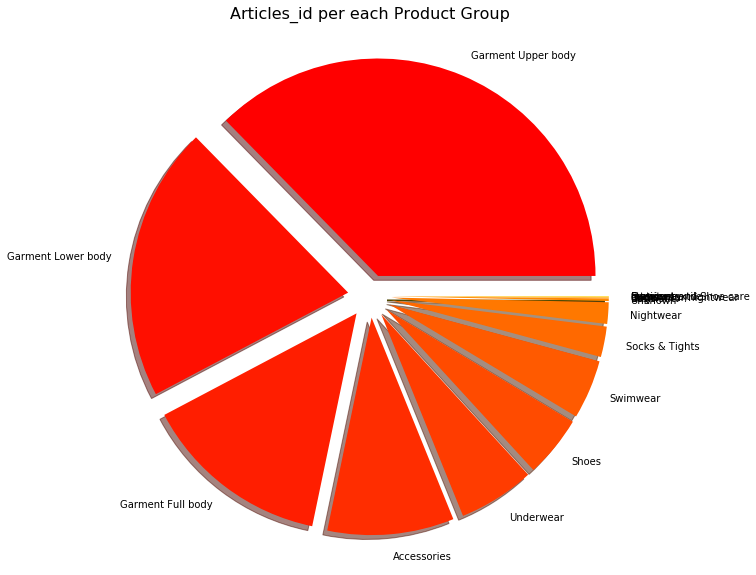

In [63]:
temp = articles.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': temp.index,'Articles': temp.values})
df = df.sort_values(['Articles'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
color = plt.cm.autumn(np.linspace(0, 1, len(df)))


pie_chart(df,
          'Articles', 
          'Product Group',
          axes, 
          color,  
          "Articles_id per each Product Group")  

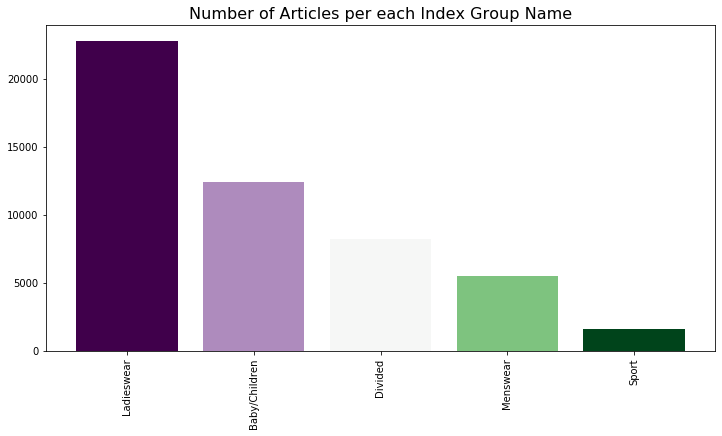

In [65]:
temp = articles.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Group Name': temp.index,'Articles': temp.values})
df = df.sort_values(['Articles'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
color = plt.cm.PRGn(np.linspace(0, 1, len(df)))

bar_plot(df,
         'Index Group Name',
         'Articles',
         axes, 
         color, 
         "Number of Articles per each Index Group Name")

#### Number of articles by Department Name

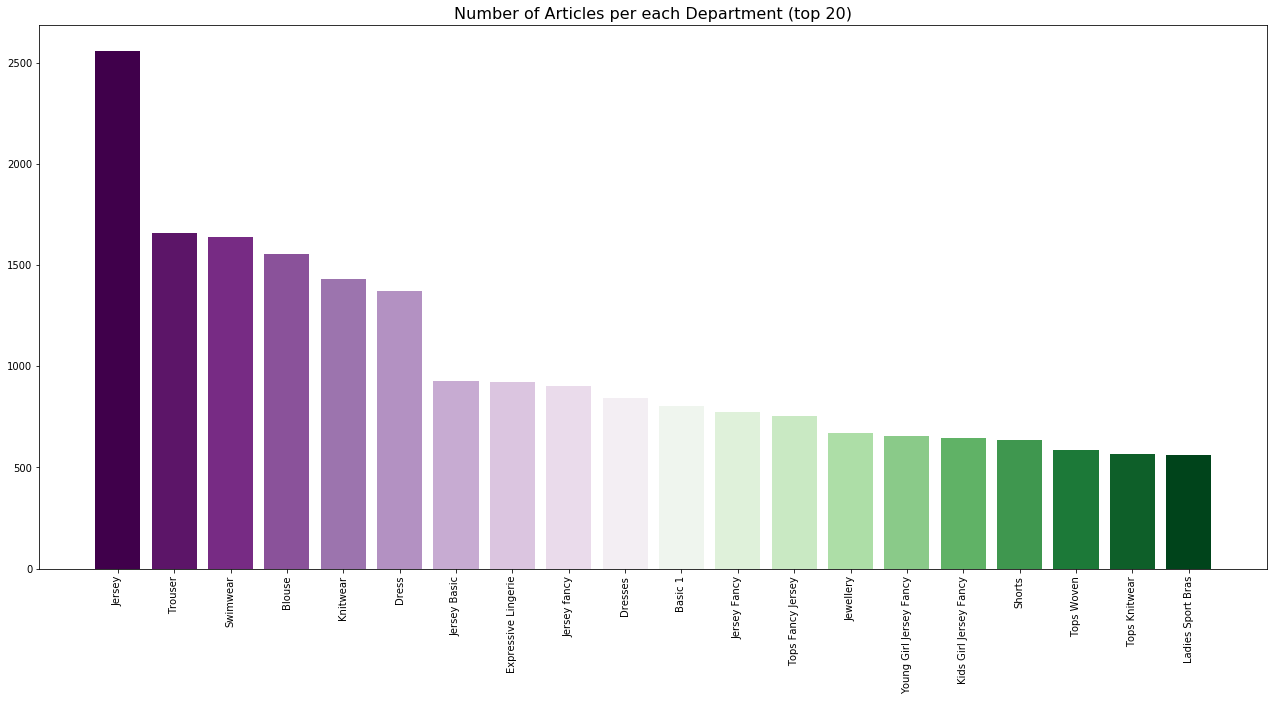

In [70]:
temp = articles.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,'Articles': temp.values})
total_depts = len(df['Department Name'].unique())
df = df.sort_values(['Articles'], ascending=False).head(20)


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,10))
color = plt.cm.PRGn(np.linspace(0, 1, len(df)))

bar_plot(df,
         'Department Name',
         'Articles',
         axes, 
         color, 
         "Number of Articles per each Department (top 20)")

#### Number of articles by Garment Gorup Name

In [62]:
temp = articles.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,'Articles': temp.values})
df

,Department Name,Articles
0,AK Bottoms,59
1,AK Dresses & Outdoor,48
2,AK Other,2
3,AK Tops Jersey & Woven,20
4,AK Tops Knitwear,11
...,...,...
238,Young Girl Shoes,98
239,Young Girl Swimwear,87
240,Young Girl Trouser,181
241,Young Girl UW/NW,187


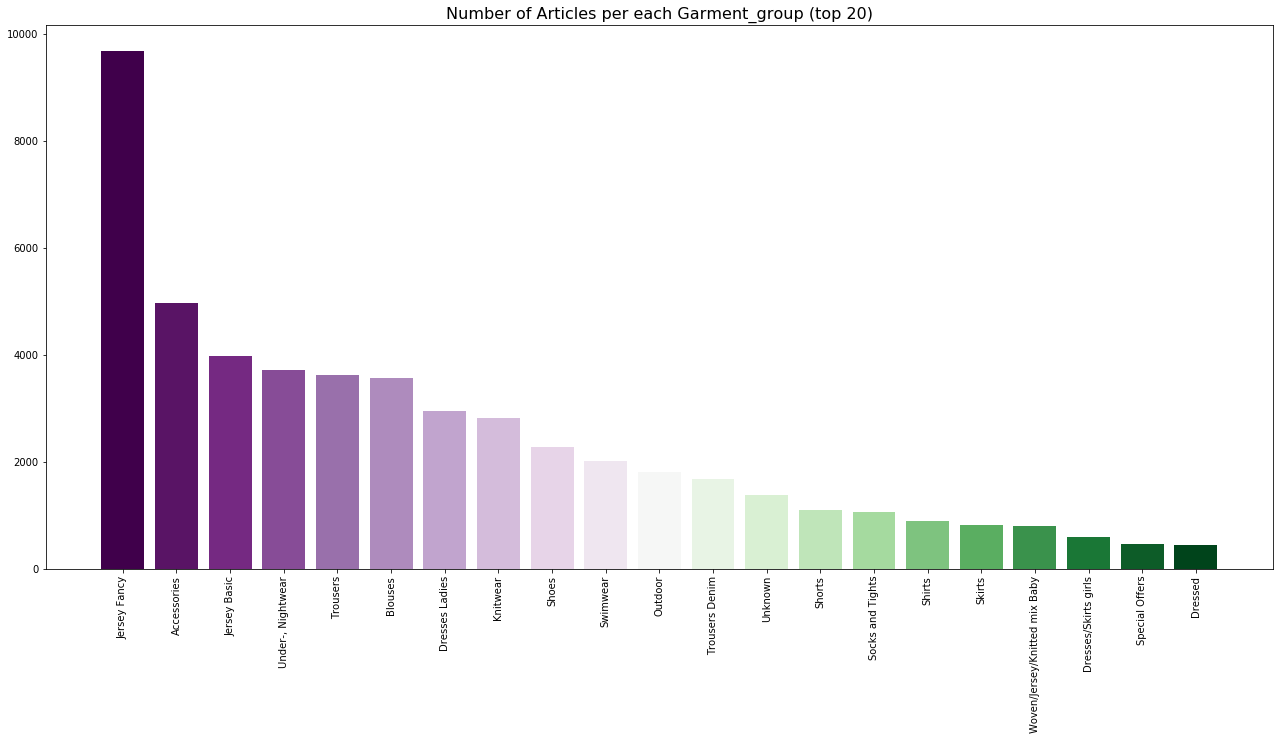

In [72]:
temp = articles.groupby(["garment_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Garment_group': temp.index,'Articles': temp.values})
total_depts = len(df['Garment_group'].unique())
df = df.sort_values(['Articles'], ascending=False)


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,10))
color = plt.cm.PRGn(np.linspace(0, 1, len(df)))

bar_plot(df,
         'Garment_group',
         'Articles',
         axes, 
         color, 
         "Number of Articles per each Garment_group (top 20)")

In [75]:
temp

garment_group_name
Accessories                      4963
Blouses                          3569
Dressed                           436
Dresses Ladies                   2949
Dresses/Skirts girls              597
Jersey Basic                     3982
Jersey Fancy                     9683
Knitwear                         2809
Outdoor                          1804
Shirts                            893
Shoes                            2284
Shorts                           1091
Skirts                            813
Socks and Tights                 1061
Special Offers                    469
Swimwear                         2012
Trousers                         3616
Trousers Denim                   1676
Under-, Nightwear                3722
Unknown                          1370
Woven/Jersey/Knitted mix Baby     800
Name: article_id, dtype: int64

    Department (244) is more detailed than Garment Group (21) 

#### Pattern: Graphical Appearance

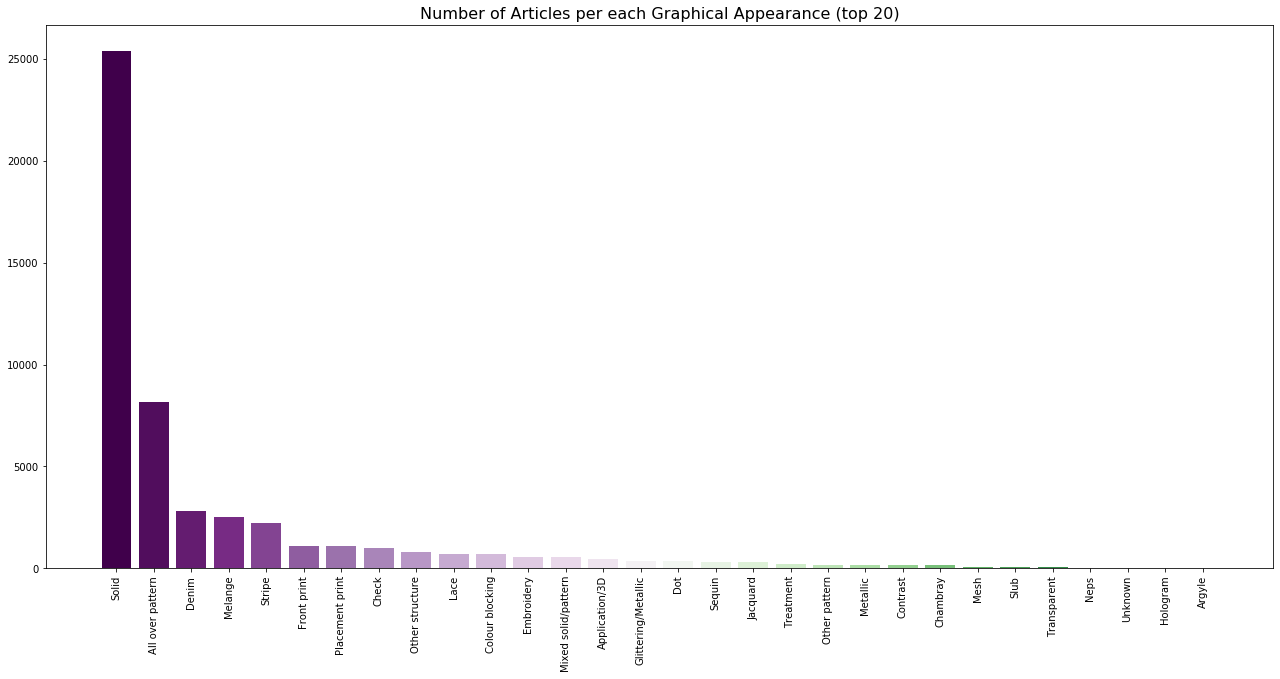

In [96]:
temp = articles.groupby(["graphical_appearance_name"])["article_id"].nunique()
df = pd.DataFrame({'Graphical Appearance Name': temp.index,'Articles': temp.values})
df = df.sort_values(['Articles'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,10))
color = plt.cm.PRGn(np.linspace(0, 1, len(df)))

bar_plot(df,
         'Graphical Appearance Name',
         'Articles',
         axes, 
         color, 
         "Number of Articles per each Graphical Appearance (top 20)")


    Solid is the mainstream graphical appearance of H&M's product.Apart from that All over pattern,Denim,Melange and Stripe also takes up a great portion.

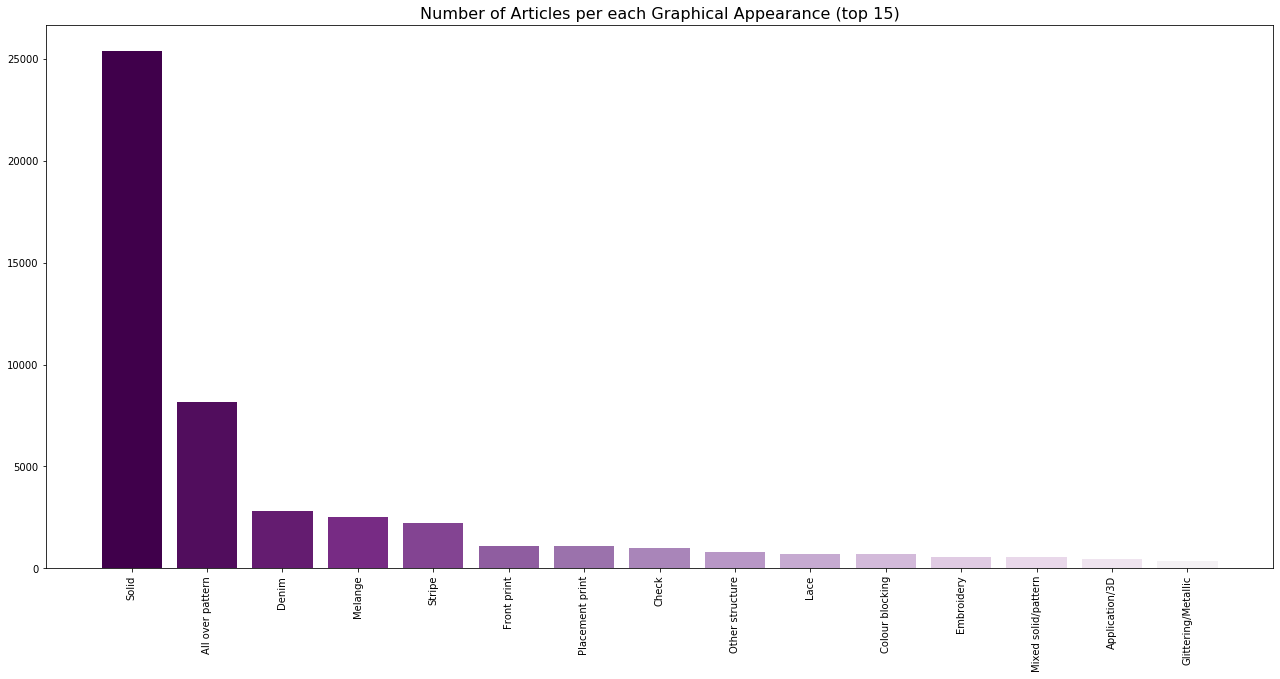

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,10))
color = plt.cm.PRGn(np.linspace(0, 1, len(df)))
bar_plot(df.head(15),
         'Graphical Appearance Name',
         'Articles',
         axes, 
         color, 
         "Number of Articles per each Graphical Appearance (top 15)")

#### Color
    color_group_name: 50 in total(有颜色深浅程度, 最细分的颜色分类 white，beige，off white）
    perceived_colour_value_name: 8 in total (general 色系 可以用于推荐同颜色不同款式同product group）
    perceived_colour_master : 20 in total （颜色统称， black/White 也可用于推荐）

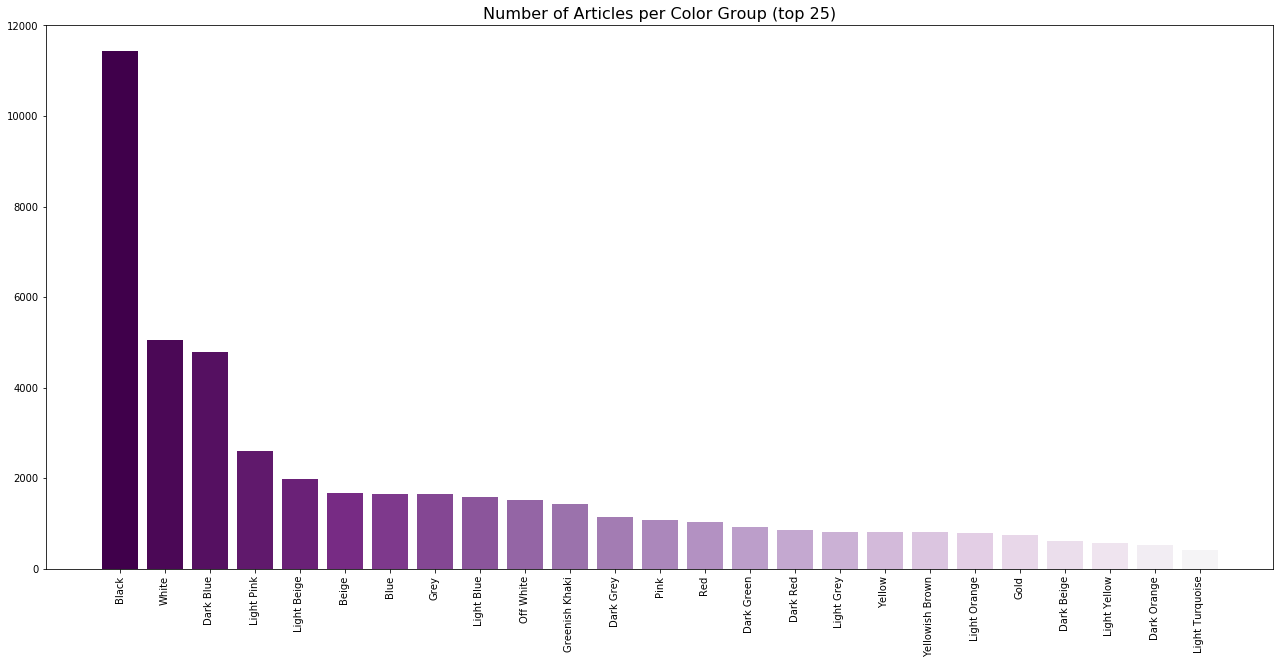

In [94]:
temp = articles.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Color Group': temp.index,'Articles': temp.values})
df = df.sort_values(['Articles'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,10))
color = plt.cm.PRGn(np.linspace(0, 1, len(df)))

bar_plot(df.head(25),
         'Color Group',
         'Articles',
         axes, 
         color, 
         "Number of Articles per Color Group (top 25)")

In [109]:
temp = articles.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Color Group': temp.index,'Articles': temp.values})
len(df)

50

    The Majority of H&M's products are Black, White, Dark Blue. Light Pink and Light Beige are also dominant

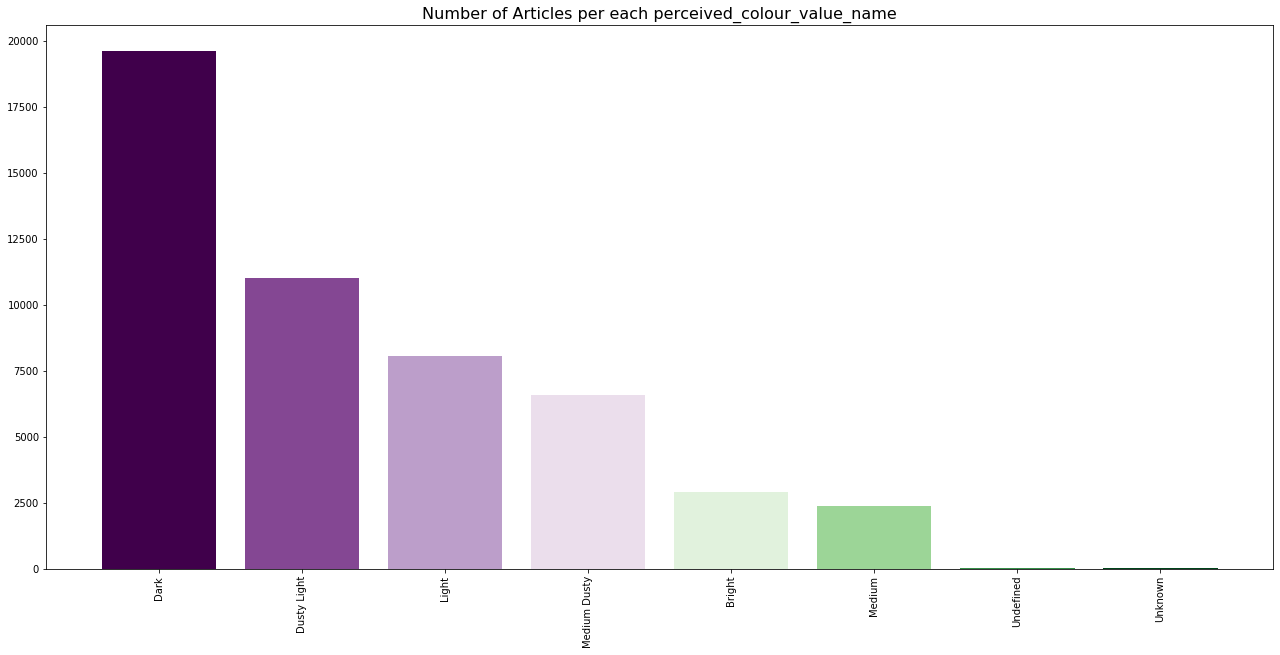

In [106]:
temp = articles.groupby(["perceived_colour_value_name"])["article_id"].nunique()
df = pd.DataFrame({'perceived_colour_value': temp.index,'Articles': temp.values})
df = df.sort_values(['Articles'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,10))
color = plt.cm.PRGn(np.linspace(0, 1, len(df)))

bar_plot(df,
         'perceived_colour_value',
         'Articles',
         axes, 
         color, 
         "Number of Articles per each perceived_colour_value_name")

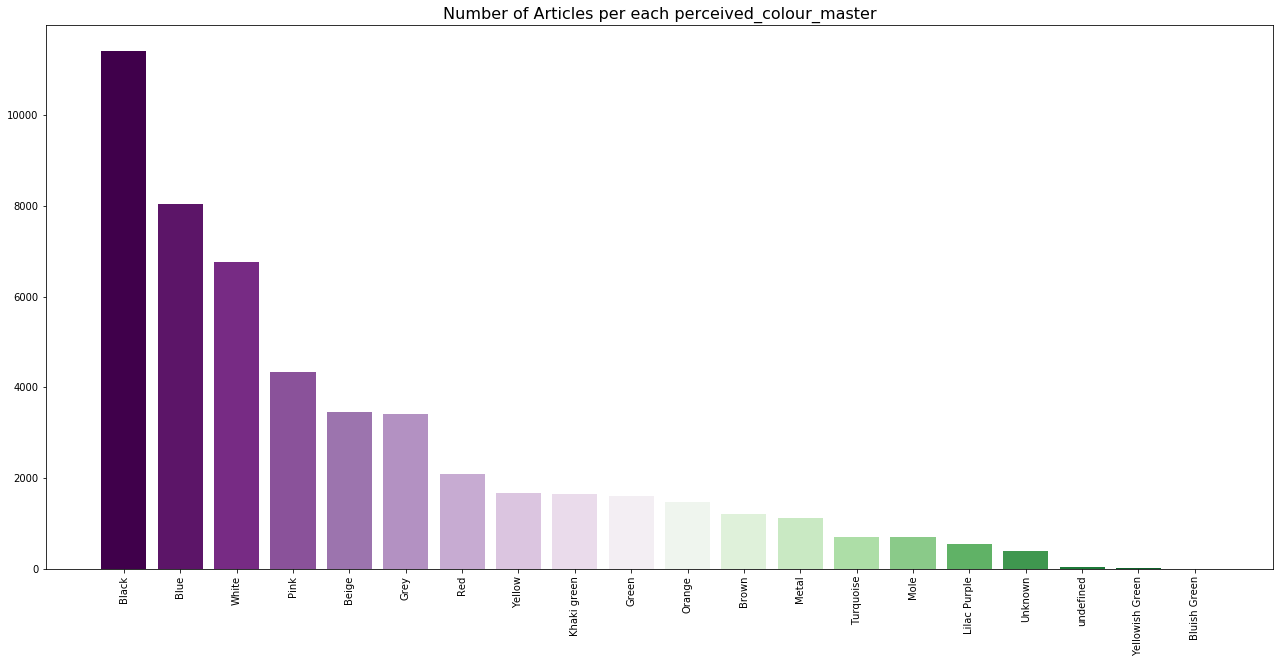

In [107]:
temp = articles.groupby(["perceived_colour_master_name"])["article_id"].nunique()
df = pd.DataFrame({'perceived_colour_master': temp.index,'Articles': temp.values})
df = df.sort_values(['Articles'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,10))
color = plt.cm.PRGn(np.linspace(0, 1, len(df)))

bar_plot(df,
         'perceived_colour_master',
         'Articles',
         axes, 
         color, 
         "Number of Articles per each perceived_colour_master")

#### Section_name

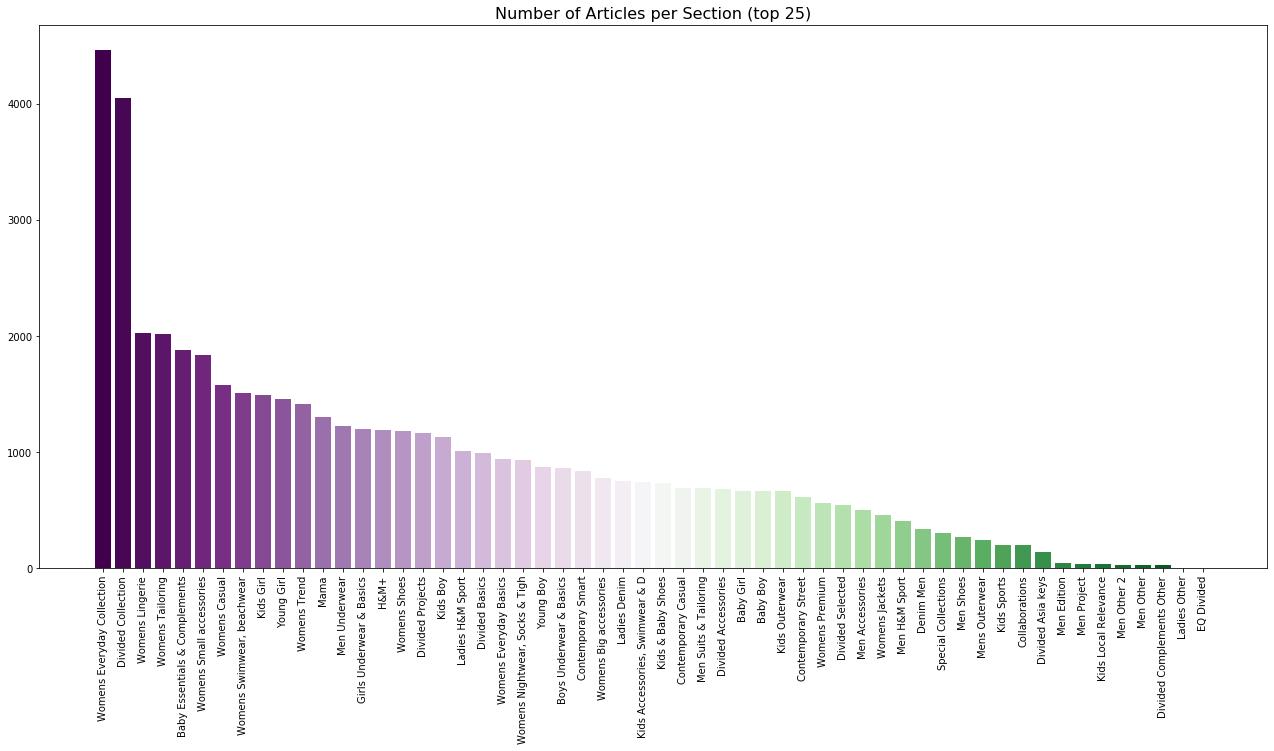

In [103]:
temp = articles.groupby(["section_name"])["article_id"].nunique()
df = pd.DataFrame({'Section': temp.index,'Articles': temp.values})
df = df.sort_values(['Articles'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(22,10))
color = plt.cm.PRGn(np.linspace(0, 1, len(df)))

bar_plot(df,
         'Section',
         'Articles',
         axes, 
         color, 
         "Number of Articles per Section (top 25)")




    Sections associate with women and baby/kids have greater number of articles